In [1]:
import warnings
warnings.filterwarnings("ignore")

# for ml functions
from ml_utils import *

# for activation function
import tensorflow as tf

# Dataset Import and Overview

In [2]:
sinais_vitais_sem_label = pd.read_csv('treino_sinais_vitais_sem_label.txt', 
                                      header=None, 
                                      index_col=0, 
                                      names=['index','pSist','pDiast','qPA','pulso','resp','gravid'])

In [3]:
sinais_vitais_sem_label

,pSist,pDiast,qPA,pulso,resp,gravid
index,,,,,,
1,13.592433,12.220855,8.416754,75.921057,21.635259,40.000000
2,15.775386,13.586879,8.725890,63.813564,19.718734,41.530426
3,3.649369,1.904802,0.000000,197.210213,19.045471,52.730748
4,17.264362,13.700638,8.733333,143.636181,17.621141,34.679910
5,12.705183,9.485389,1.747626,82.636672,12.209535,69.375881
...,...,...,...,...,...,...
1496,17.151411,6.020803,4.774128,6.701052,7.380529,24.494467
1497,13.114511,12.500453,8.400144,81.203081,13.630509,65.385014
1498,17.976320,6.054430,4.768427,143.261527,21.843486,24.530703


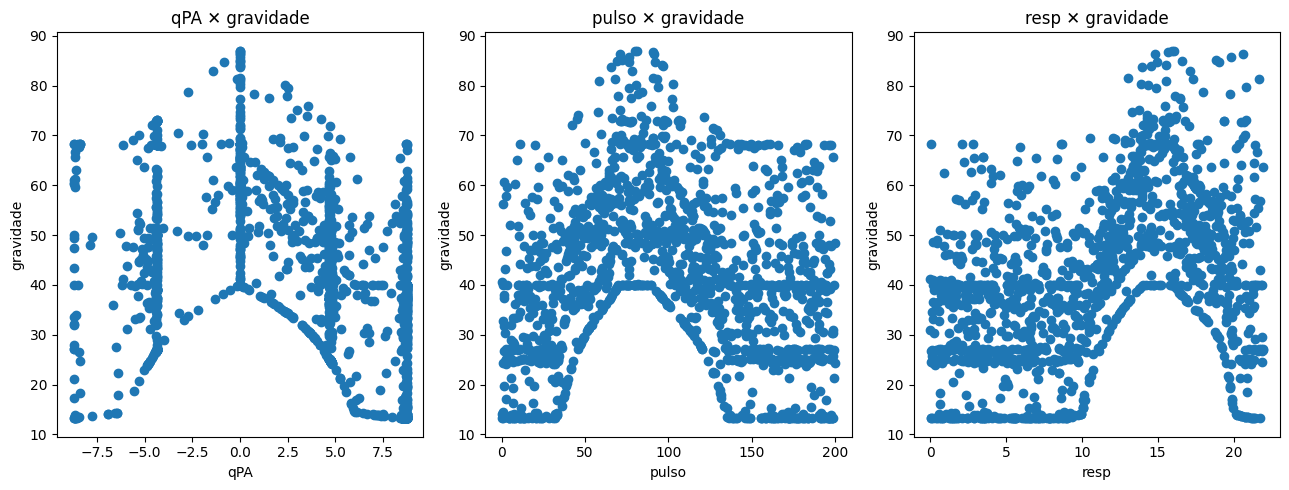

In [4]:
# Create a figure with three subplots arranged in a single row
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

# Scatter plot for qPA vs. gravidade
axes[0].scatter(sinais_vitais_sem_label['qPA'], sinais_vitais_sem_label['gravid'])
axes[0].set_xlabel('qPA')
axes[0].set_ylabel('gravidade')
axes[0].set_title('qPA ✕ gravidade')

# Scatter plot for pulso vs. gravidade
axes[1].scatter(sinais_vitais_sem_label['pulso'], sinais_vitais_sem_label['gravid'])
axes[1].set_xlabel('pulso')
axes[1].set_ylabel('gravidade')
axes[1].set_title('pulso ✕ gravidade')

# Scatter plot for resp vs. gravidade
axes[2].scatter(sinais_vitais_sem_label['resp'], sinais_vitais_sem_label['gravid'])
axes[2].set_xlabel('resp')
axes[2].set_ylabel('gravidade')
axes[2].set_title('resp ✕ gravidade')

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

In [5]:
sinais_vitais_com_label = pd.read_csv('treino_sinais_vitais_com_label.txt',
                                      header=None,
                                      index_col=0,
                                      names=['','pSist','pDiast','qPA','pulso','resp','gravid','classe'])

In [6]:
sinais_vitais_com_label

,pSist,pDiast,qPA,pulso,resp,gravid,classe
,,,,,,,
1,13.592433,12.220855,8.416754,75.921057,21.635259,40.000000,2
2,15.775386,13.586879,8.725890,63.813564,19.718734,41.530427,2
3,3.649369,1.904802,0.000000,197.210213,19.045471,52.730745,3
4,17.264362,13.700638,8.733333,143.636181,17.621141,34.679911,2
5,12.705183,9.485389,1.747626,82.636672,12.209535,69.375882,3
...,...,...,...,...,...,...,...
1496,17.151411,6.020803,4.774128,6.701052,7.380529,24.494467,1
1497,13.114511,12.500453,8.400144,81.203081,13.630509,65.385011,3
1498,17.976320,6.054430,4.768427,143.261527,21.843486,24.530704,1


In [7]:
# One-hot encoding
## First, convert the 'classe' column to a categorical data type to ensure the correct order of categories.
sinais_vitais_com_label['classe'] = pd.Categorical(sinais_vitais_com_label['classe'])

## Perform one-hot encoding
one_hot_encoded = pd.get_dummies(sinais_vitais_com_label, columns=['classe'], prefix='classe')

Text(0, 0.5, 'classe')

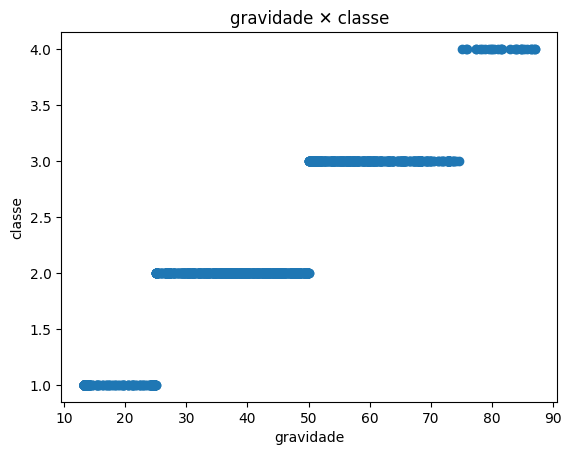

In [8]:
plot_com_label = plt.scatter(sinais_vitais_com_label['gravid'],sinais_vitais_com_label['classe'])
plt.title('gravidade ✕ classe')
plt.xlabel('gravidade')
plt.ylabel('classe')

# Regression

## Build Perceptron (single layer neural network)

In [9]:
# define inputs and outputs
x_regre = sinais_vitais_sem_label.loc[:,['qPA','pulso','resp']]
y_regre = sinais_vitais_sem_label['gravid']

In [11]:
# define metric R squared
def R2(y, y_hat):
    ss_res = K.sum(K.square(y - y_hat))
    ss_tot = K.sum(K.square(y - K.mean(y)))
    return ( 1 - ss_res/(ss_tot + K.epsilon()) )

### Set0

In [12]:
# Create model relu
model_regre = models.Sequential(name='ModelRegression', layers=[
    layers.Dense(name='H1',
        input_dim=3,
        units=1,
        activation='relu'
    )
])
#model_regre.summary()
#visualize_nn(model_regre, description=True, figsize=(7,7))

# define the optimizer, loss and metrics
model_regre.compile(optimizer='adam', 
                    loss='mean_absolute_error',
                    metrics=[R2])

### Set1

In [13]:
# Create model relu
model_regre = models.Sequential(name='ModelRegression', layers=[
    layers.Dense(name='H1',
        input_dim=3,
        units=1,
        activation=tf.keras.layers.LeakyReLU(alpha=0.01)
    )
])
#model_regre.summary()
#visualize_nn(model_regre, description=True, figsize=(7,7))

# define the optimizer, loss and metrics
model_regre.compile(optimizer='adam', 
                    loss='mean_absolute_error',
                    metrics=[R2])

### Set2

Model: "ModelRegression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 H1 (Dense)                  (None, 2)                 8         
                                                                 
 D1 (Dropout)                (None, 2)                 0         
                                                                 
 H2 (Dense)                  (None, 1)                 3         
                                                                 
Total params: 11 (44.00 Byte)
Trainable params: 11 (44.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


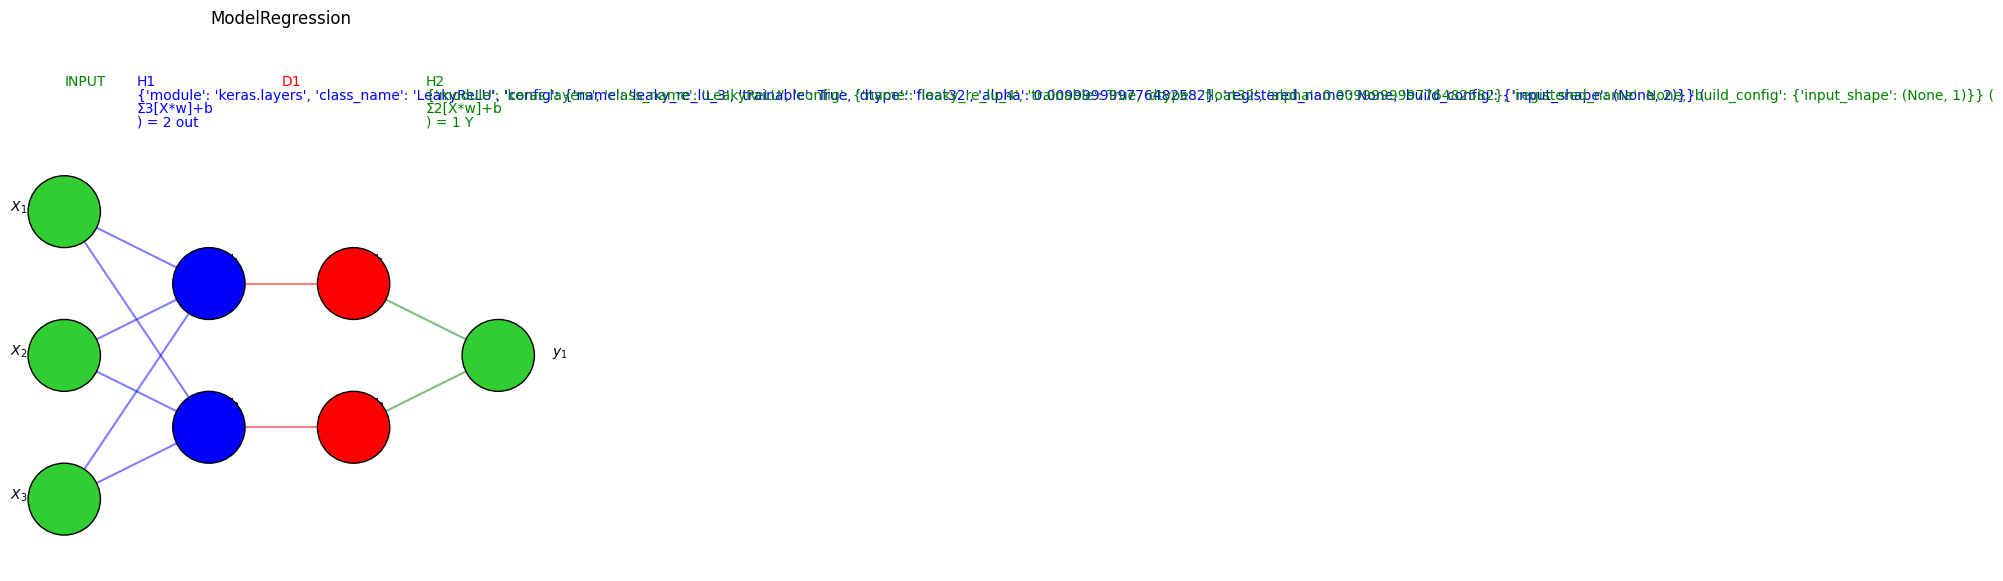

In [17]:
# Create model relu
model_regre = models.Sequential(name='ModelRegression', layers=[
    layers.Dense(name='H1',
        input_dim=3,
        units=2,
        activation=tf.keras.layers.LeakyReLU(alpha=0.01)
    ),
    layers.Dropout(0.5, name='D1',),
    layers.Dense(1, name='H2', activation=tf.keras.layers.LeakyReLU(alpha=0.01))
])
model_regre.summary()
visualize_nn(model_regre, description=True, figsize=(7,7))

# define the optimizer, loss and metrics
model_regre.compile(optimizer='adam', 
                    loss='mean_absolute_error',
                    metrics=[R2])

## Train/Validation Regression

In [18]:
# train/validation
training_regre = model_regre.fit(x=x_regre, y=y_regre, batch_size=16, epochs=1000, 
                                 shuffle=True, verbose=0, validation_split=0.2)

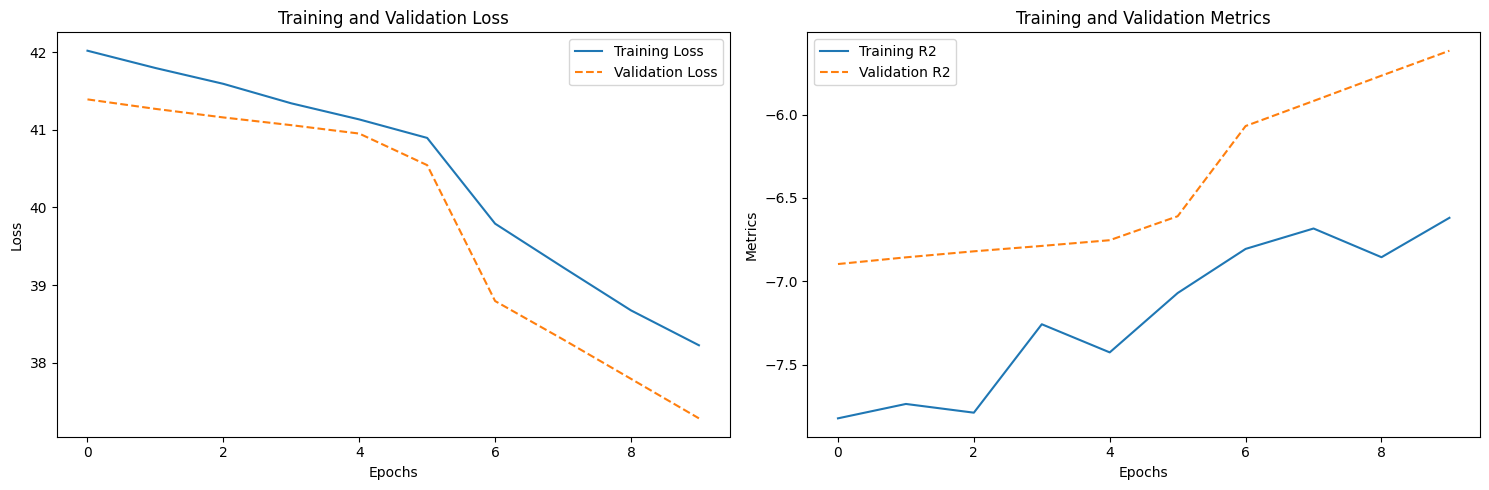

In [33]:
# plot
metrics = [k for k in training_regre.history.keys() if ("loss" not in k) and ("val" not in k)]
# Plot training and validation loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)

# Training loss
plt.plot(training_regre.history['loss'], label='Training Loss')
# Validation loss
plt.plot(training_regre.history['val_loss'], label='Validation Loss', linestyle='--')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation metrics
plt.subplot(1, 2, 2)

for metric in metrics:
    # Training metrics
    plt.plot(training_regre.history[metric], label='Training ' + metric)
    # Validation metrics
    plt.plot(training_regre.history['val_' + metric], label='Validation ' + metric, linestyle='--')

plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()

plt.tight_layout()
plt.show()

# Classification

In [21]:
# define metrics for CLASSIFICATION
def Recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def Precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def F1(y_true, y_pred):
    precision = Precision(y_true, y_pred)
    recall = Recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

## Build model

Model: "Classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 4)                 8         
                                                                 
Total params: 8 (32.00 Byte)
Trainable params: 8 (32.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


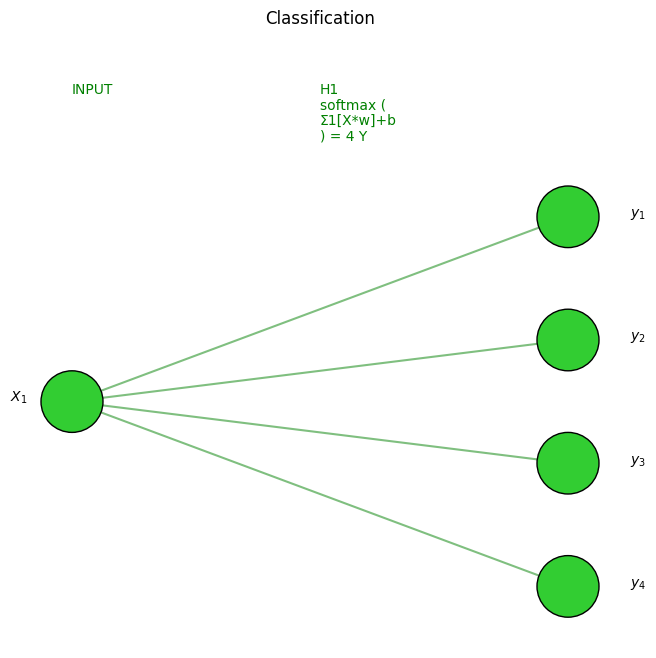

In [27]:
model_class = models.Sequential(name='Classification', layers=[
    layers.Dense(
        name='h1',
        input_dim=1,
        units=4,  # Four units for four classes
        activation='softmax'  # Apply softmax activation for multi-class classification
    )
])
model_class.summary()

# compile the neural network
model_class.compile(optimizer='adam', loss='categorical_crossentropy',  # Use categorical cross-entropy
                    metrics=['accuracy', F1])

# Visualize the model architecture
visualize_nn(model_class, description=True, figsize=(8,8))

In [24]:
# define inputs and outputs
x_class = sinais_vitais_com_label['gravid']
y_class = one_hot_encoded.loc[:,['classe_1','classe_2','classe_3','classe_4']]

## Train/Validation Classification

In [25]:
# train/validation
training_class = model_class.fit(x=x_class, y=y_class, batch_size=16, epochs=1000, 
                                 shuffle=True, verbose=0, validation_split=0.3)

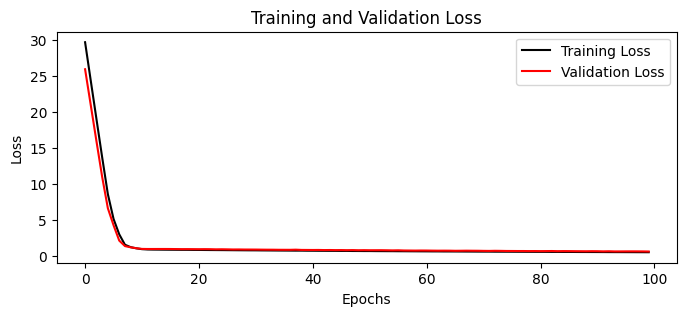

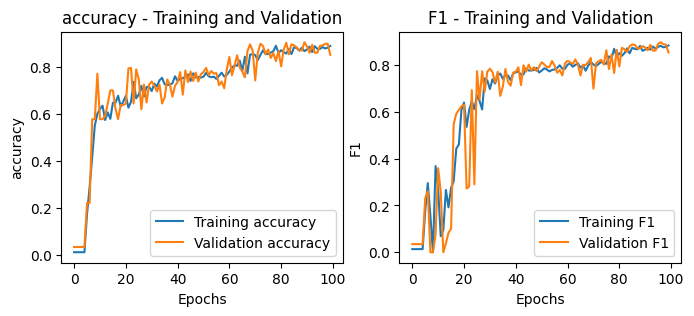

In [36]:
# plot
metrics = [k for k in training_class.history.keys() if ("loss" not in k) and ("val" not in k)]
# Plot training and validation losses together
fig_loss, ax_loss = plt.subplots(nrows=1, ncols=1, figsize=(8, 3))

ax_loss.set(title="Training and Validation Loss")
ax_loss.plot(training_class.history['loss'], color='black', label='Training Loss')
ax_loss.plot(training_class.history['val_loss'], color='red', label='Validation Loss')
ax_loss.set_xlabel('Epochs')
ax_loss.set_ylabel('Loss', color='black')
ax_loss.legend()

# Create separate graphs for each metric
fig_metrics, ax_metrics = plt.subplots(nrows=1, ncols=len(metrics), figsize=(8, 3))

for i, metric in enumerate(metrics):
    ax_metrics[i].set(title=metric + ' - Training and Validation')
    ax_metrics[i].plot(training_class.history[metric], label='Training ' + metric)
    ax_metrics[i].plot(training_class.history['val_' + metric], label='Validation ' + metric)
    ax_metrics[i].set_xlabel('Epochs')
    ax_metrics[i].set_ylabel(metric, color='black')
    ax_metrics[i].legend()

plt.show()

## Misc code i don't know what to do with yet

In [ ]:
# define metrics for CLASSIFICATION
def Recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def Precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def F1(y_true, y_pred):
    precision = Precision(y_true, y_pred)
    recall = Recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the neural network
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy',F1])

In [ ]:
# define metrics for REGRESSION
def R2(y, y_hat):
    ss_res = K.sum(K.square(y - y_hat))
    ss_tot = K.sum(K.square(y - K.mean(y)))
    return ( 1 - ss_res/(ss_tot + K.epsilon()) )

# compile the neural network
model.compile(optimizer='adam', loss='mean_absolute_error',
              metrics=[R2])

In [ ]:
X = np.random.rand(1000,10)
y = np.random.choice([1,0], size=1000)

In [ ]:
# train/validation
training = model.fit(x=X, y=y, batch_size=32, epochs=100, 
                     shuffle=True, verbose=0, validation_split=0.3)

# plot
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))

## training
ax[0].set(title="Training")
ax11 = ax[0].twinx()
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss', color='black')
for metric in metrics:
    ax11.plot(training.history[metric], label=metric)
ax11.set_ylabel("Score", color='steelblue')
ax11.legend()

## validation
ax[1].set(title="Validation")
ax22 = ax[1].twinx()
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
    ax22.plot(training.history['val_'+metric], label=metric)
ax22.set_ylabel("Score", color="steelblue")
plt.show()

In [ ]:
n_features = 10
model = models.Sequential(name="DeepNN", layers=[
    ### hidden layer 1
    layers.Dense(name="h1", input_dim=n_features,
                 units=int(round((n_features+1)/2)),
                 activation='relu'),
    layers.Dropout(name="drop1", rate=0.2),
    
    ### hidden layer 2
    layers.Dense(name="h2", units=int(round((n_features+1)/4)),
                 activation='relu'),
    layers.Dropout(name="drop2", rate=0.2),
    
    ### layer output
    layers.Dense(name="output", units=1, activation='sigmoid')
])
model.summary()

In [ ]:
visualize_nn(model)

In [ ]:
# show feature contribution with shap
i = 1

explainer_shap(model,
               X_names=list_feature_names,
               X_instance=X[i],
               X_train=X,
               task="classification", #task="regression"
               top=10)